(398, 30)
(171, 30)
[1.         0.88235294 0.94117647 0.88235294 0.94117647 1.
 0.88235294 0.88235294 1.         1.        ]
Test set accuracy with Logistic Regression: 94.74


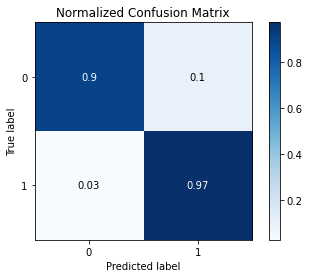

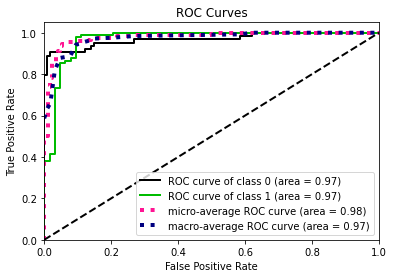

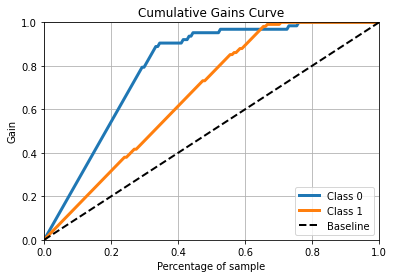

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

# Load the data
cancer = load_breast_cancer()
inputs = cancer.data
outputs = cancer.target

 
temp1 = np.reshape(inputs[:, 1], (len(inputs[:, 1]), 1))
temp2 = np.reshape(inputs[:, 2], (len(inputs[:, 2]), 1))
X = np.hstack((temp1, temp2))
temp = np.reshape(inputs[:, 5], (len(inputs[:, 5]), 1))
X = np.hstack((X, temp))
temp = np.reshape(inputs[:, 8], (len(inputs[:, 8]), 1))
X = np.hstack((X, temp))
 
y = outputs.reshape(outputs.shape[0], 1)

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,test_size=0.3,random_state=0)
print(X_train.shape)
print(X_test.shape)
# Logistic Regression
logreg = LogisticRegression(solver='sag', max_iter = 10000)
logreg.fit(X_train, y_train)

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
#Cross validation
accuracy = cross_validate(logreg,X_test,y_test,cv=10)['test_score']
print(accuracy)
print("Test set accuracy with Logistic Regression: {:.2f}".format(logreg.score(X_test,y_test)*100))

import scikitplot as skplt
y_pred = logreg.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.savefig('/home/Kristen/Documents/FYS4155/Excecises/confusion_matrix.pdf')  
plt.show()
y_probas = logreg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
plt.show()